In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv


In [2]:
df = pd.read_csv('/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# age : (days)
# gender(2: 'male', 1:'female')
# ap_hi[systolic blood pressure]
# ap_lo[diastolic blood pressure]
# cholesterol level[ 1: normal, 2: above normal, 3: well above normal]
# glucose level [1: normal, 2: above normal, 3: well above normal]
# smoker [0: 'No', 1:'Yes']
# alcohol_intake [0: 'No', 1:'Yes']
# physical_activity [0: 'No', 1:'Yes']
# cardiovascular_health [0:'Bad', 1:'Yes']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [6]:
features = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

dict1 = {0: 'no', 1: 'yes'}
dict2 = {1: 'normal', 2: 'above normal', 3: 'well above normal'}
dict3 = {1: 'female', 2: 'male'}

yes_no_features = ['smoke', 'alco', 'active', 'cardio']
features2 = ['ap_hi', 'ap_lo', 'cholesterol', 'gluc']
features3 = ['gender']
features4 = ['age']

def clean_df(df):
    """Cleans the dataframe and ensures uniformity of the dataset"""

    for feature in features:
        if feature in yes_no_features:
            df[feature] = df[feature].replace(dict1)
        elif feature in features2:
            df[feature] = df[feature].replace(dict2)
        elif feature in features3:
            df[feature] = df[feature].replace(dict3)
        elif feature == 'age':
            df[feature] = round(df[feature] / 365.25)# .astype(int)
        #else:
            #print(f'Clean data for {feature}')

    return df

In [7]:
df1 = clean_df(df)

In [8]:
#df1['age'] = df1['age']

In [9]:
df1.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,male,168,62.0,110,80,normal,normal,no,no,yes,no
1,1,55.0,female,156,85.0,140,90,well above normal,normal,no,no,yes,yes
2,2,52.0,female,165,64.0,130,70,well above normal,normal,no,no,no,yes
3,3,48.0,male,169,82.0,150,100,normal,normal,no,no,yes,yes
4,4,48.0,female,156,56.0,100,60,normal,normal,no,no,no,no


In [10]:
# feature reduction
df1['height_meter'] = df1['height'] / 100
df1['weight_kg'] = df1['weight'].astype(int)

# renaming features
df1 = df1.rename(columns={
    'ap_hi': 'systolic blood pressure',
    'ap_lo': 'diastolic blood pressure',
    'cholesterol': 'cholesterol level',
    'gluc': 'glucose level',
    'alco': 'alcohol intake',
    'cardio': 'cardiovascular illness'
})

In [11]:
df1.head()

,id,age,gender,height,weight,systolic blood pressure,diastolic blood pressure,cholesterol level,glucose level,smoke,alcohol intake,active,cardiovascular illness,height_meter,weight_kg
0,0,50.0,male,168,62.0,110,80,normal,normal,no,no,yes,no,1.68,62
1,1,55.0,female,156,85.0,140,90,well above normal,normal,no,no,yes,yes,1.56,85
2,2,52.0,female,165,64.0,130,70,well above normal,normal,no,no,no,yes,1.65,64
3,3,48.0,male,169,82.0,150,100,normal,normal,no,no,yes,yes,1.69,82
4,4,48.0,female,156,56.0,100,60,normal,normal,no,no,no,no,1.56,56


# Feature Engineering

In [12]:
df2 = df1.copy()
df2['body mass index'] = ((df2['weight_kg']) / ((df2['height_meter']) ** 2)).round().astype(int)

df2.drop(columns=['id','height','weight',], inplace=True)#'height_meter','weight_kg'], inplace=True)
df2.sample(n=5)

,age,gender,systolic blood pressure,diastolic blood pressure,cholesterol level,glucose level,smoke,alcohol intake,active,cardiovascular illness,height_meter,weight_kg,body mass index
67315,60.0,female,190,80,above normal,normal,no,no,yes,yes,1.70,84,29
16629,40.0,female,70,50,normal,normal,no,no,yes,no,1.62,57,22
51923,64.0,male,120,80,normal,normal,no,no,no,yes,1.73,68,23
61241,60.0,female,130,80,normal,normal,no,no,yes,no,1.63,58,22
14710,51.0,female,120,80,above normal,normal,no,no,no,yes,1.60,64,25


In [13]:
# Remove the string 'normal' from 'diastolic blood pressure' column
df3 = df2.copy()
df3 = df3[df3['diastolic blood pressure'] != 'normal']

# Filter diastolic blood pressure values between 50 and 140 (inclusive)
df3 = df3[(df3['diastolic blood pressure'] >= 50) & (df3['diastolic blood pressure'] <= 140)]

# Remove the string 'normal' from 'systolic blood pressure' column
df3 = df3[df3['systolic blood pressure'] != 'normal']

# Filter systolic blood pressure values between 80 and 190 (inclusive)
df3 = df3[(df3['systolic blood pressure'] >= 80) & (df3['systolic blood pressure'] <= 190)]

In [14]:
df3['systolic blood pressure'].unique()

array([110, 140, 130, 150, 100, 120, 145, 170, 135, 125, 90, 180, 160,
       133, 190, 80, 122, 169, 126, 158, 123, 161, 147, 115, 137, 153,
       148, 105, 119, 141, 165, 164, 124, 172, 162, 117, 134, 166, 176,
       116, 121, 112, 113, 118, 155, 142, 131, 157, 136, 146, 138, 159,
       109, 85, 106, 129, 93, 95, 179, 156, 168, 132, 104, 103, 175, 128,
       151, 139, 127, 108, 144, 102, 143, 107, 184, 178, 149, 167, 114,
       101, 171, 111, 188, 185, 163, 173, 154, 177, 174, 152, 96, 99, 97,
       187], dtype=object)

In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68562 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       68562 non-null  float64
 1   gender                    68562 non-null  object 
 2   systolic blood pressure   68562 non-null  object 
 3   diastolic blood pressure  68562 non-null  object 
 4   cholesterol level         68562 non-null  object 
 5   glucose level             68562 non-null  object 
 6   smoke                     68562 non-null  object 
 7   alcohol intake            68562 non-null  object 
 8   active                    68562 non-null  object 
 9   cardiovascular illness    68562 non-null  object 
 10  height_meter              68562 non-null  float64
 11  weight_kg                 68562 non-null  int64  
 12  body mass index           68562 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 7.3+ MB


In [16]:
#systolic = 90-180mmHg
#diastolic = 60-120mmHg

In [17]:
# sum of duplicated values in the DataFrame
df3.duplicated(keep=False).sum()

6423

In [18]:
df3 = df3.drop_duplicates(keep= 'first')

In [19]:
# Remove the string 'normal' from 'diastolic blood pressure' column
df3 = df3[df3['diastolic blood pressure'] != 'normal']

# Filter diastolic blood pressure values between 50 and 140 (inclusive)
df3 = df3[(df3['diastolic blood pressure'] >= 50) & (df3['diastolic blood pressure'] <= 140)]

# Remove the string 'normal' from 'systolic blood pressure' column
df3 = df3[df3['systolic blood pressure'] != 'normal']

# Filter systolic blood pressure values between 80 and 190 (inclusive)
df3 = df3[(df3['systolic blood pressure'] >= 80) & (df3['systolic blood pressure'] <= 190)]

In [20]:
df3['diastolic blood pressure'] = df3['diastolic blood pressure'].astype(int)
df3['systolic blood pressure'] = df3['systolic blood pressure'].astype(int)

In [21]:
#df3.duplicated(keep=False).sum()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64737 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       64737 non-null  float64
 1   gender                    64737 non-null  object 
 2   systolic blood pressure   64737 non-null  int64  
 3   diastolic blood pressure  64737 non-null  int64  
 4   cholesterol level         64737 non-null  object 
 5   glucose level             64737 non-null  object 
 6   smoke                     64737 non-null  object 
 7   alcohol intake            64737 non-null  object 
 8   active                    64737 non-null  object 
 9   cardiovascular illness    64737 non-null  object 
 10  height_meter              64737 non-null  float64
 11  weight_kg                 64737 non-null  int64  
 12  body mass index           64737 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 6.9+ MB


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

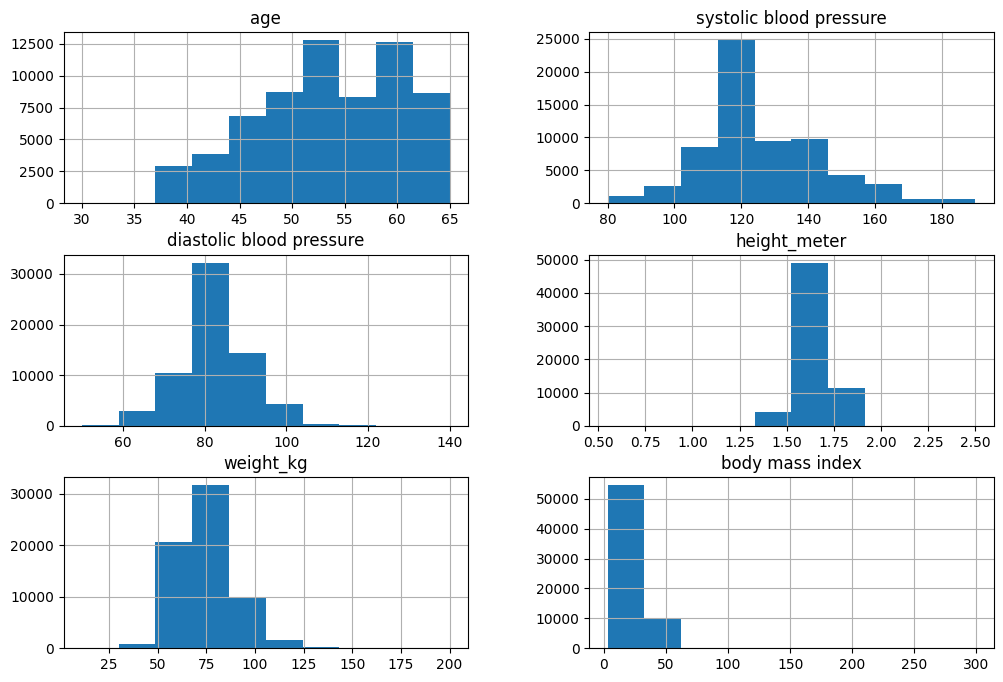

In [23]:
df3.hist(bins =10, figsize=(12,8))
plt.show()

In [24]:
#df3.head()

In [25]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(df3, test_size=0.2, random_state=42)

In [26]:
train_set

,age,gender,systolic blood pressure,diastolic blood pressure,cholesterol level,glucose level,smoke,alcohol intake,active,cardiovascular illness,height_meter,weight_kg,body mass index
57633,57.0,male,120,80,normal,normal,no,no,yes,no,1.54,52,22
69673,50.0,female,90,60,above normal,above normal,no,no,no,yes,1.55,65,27
20268,54.0,male,150,90,normal,normal,no,no,yes,yes,1.70,75,26
61230,60.0,female,110,70,above normal,above normal,no,no,no,no,1.57,65,26
5272,58.0,female,120,80,normal,normal,no,no,no,no,1.65,60,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67561,64.0,female,130,80,normal,normal,no,no,yes,no,1.68,72,26
40493,46.0,female,130,80,above normal,above normal,no,no,no,yes,1.74,114,38
877,46.0,female,160,80,normal,normal,yes,no,yes,yes,1.62,80,30
16408,64.0,female,120,80,normal,normal,no,yes,yes,no,1.53,57,24


In [27]:
#train_set.head()
X = train_set.drop(columns=['cardiovascular illness'])
y = train_set['cardiovascular illness'].copy()

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

numerical_features = ['age', 'body mass index','systolic blood pressure', 'diastolic blood pressure']
categorical_features = ['gender', 'cholesterol level','glucose level', 'smoke', 'alcohol intake', 'active']

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, numerical_features),
    ("cat", cat_pipeline, categorical_features),
])

In [29]:
# correlation

In [30]:
#df3['systolic blood pressure'].value_counts()
#X.info()

In [31]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [32]:
X_prepared = preprocessing.fit_transform(X)

In [33]:
X_prepared

array([[ 0.54323785, -0.40667907, -0.14216139, ...,  0.        ,
         0.        ,  1.        ],
       [-0.48423221, -2.20871219, -2.22555385, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.10289354,  1.39535405,  0.89953483, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.07135796,  1.99603176, -0.14216139, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.57070791, -0.40667907, -0.14216139, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.57070791,  0.19399864, -0.14216139, ...,  0.        ,
         1.        ,  0.        ]])

In [34]:
# X

In [35]:
# X['active'].unique()

In [36]:
X_prepared_fr = pd.DataFrame(
    X_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=X.index)
X_prepared_fr.head(2)

,pipeline-1__age,pipeline-1__systolic blood pressure,pipeline-1__diastolic blood pressure,pipeline-1__height_meter,pipeline-1__weight_kg,pipeline-1__body mass index,pipeline-2__gender_female,pipeline-2__gender_male,pipeline-2__cholesterol level_above normal,pipeline-2__cholesterol level_normal,pipeline-2__cholesterol level_well above normal,pipeline-2__glucose level_above normal,pipeline-2__glucose level_normal,pipeline-2__glucose level_well above normal,pipeline-2__smoke_no,pipeline-2__smoke_yes,pipeline-2__alcohol intake_no,pipeline-2__alcohol intake_yes,pipeline-2__active_no,pipeline-2__active_yes
57633,0.543238,-0.406679,-0.142161,-1.251574,-1.551395,-0.955458,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
69673,-0.484232,-2.208712,-2.225554,-1.131043,-0.653619,-0.106436,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [37]:
from sklearn.linear_model import LogisticRegression
log_clf = make_pipeline(preprocessing, LogisticRegression())
log_clf.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d806eb6d630>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d806eb6e530>)])),
                ('logisticregression', LogisticRegression())])

In [38]:
train_predictions = log_clf.predict(X)
train_predictions

array(['no', 'no', 'yes', ..., 'yes', 'no', 'yes'], dtype=object)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y, train_predictions))

              precision    recall  f1-score   support

          no       0.70      0.77      0.73     25544
         yes       0.75      0.68      0.72     26245

    accuracy                           0.72     51789
   macro avg       0.73      0.72      0.72     51789
weighted avg       0.73      0.72      0.72     51789



In [40]:
# test_set.info()

In [41]:
X_test = test_set.drop('cardiovascular illness', axis=1)
y_test = test_set['cardiovascular illness'].copy()

In [42]:
test_predictions1 = log_clf.predict(X_test)

In [43]:
print(classification_report(y_test, test_predictions1))

              precision    recall  f1-score   support

          no       0.70      0.76      0.73      6304
         yes       0.75      0.69      0.72      6644

    accuracy                           0.73     12948
   macro avg       0.73      0.73      0.73     12948
weighted avg       0.73      0.73      0.73     12948



In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = make_pipeline(preprocessing, RandomForestClassifier(n_estimators=1_000))
rf_clf.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d806eb6d630>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d806eb6e530>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=1000))])

In [45]:
test_predictions = rf_clf.predict(X_test)

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

          no       0.68      0.68      0.68      6304
         yes       0.69      0.70      0.70      6644

    accuracy                           0.69     12948
   macro avg       0.69      0.69      0.69     12948
weighted avg       0.69      0.69      0.69     12948



In [46]:
dict2 = {'no':0, 'yes':1}
test_set['cardiovascular illness'] = test_set['cardiovascular illness'].replace(dict2)

/tmp/ipykernel_18/2700731287.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_set['cardiovascular illness'] = test_set['cardiovascular illness'].replace(dict2)


In [47]:
X_test = test_set.drop(columns = ['cardiovascular illness'])
y_test = test_set['cardiovascular illness'].copy()

In [48]:
#y_test

In [49]:
dict2 = {'no':0, 'yes':1}
train_set['cardiovascular illness'] = train_set['cardiovascular illness'].replace(dict2)
# train_set.head()

/tmp/ipykernel_18/1631585773.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_set['cardiovascular illness'] = train_set['cardiovascular illness'].replace(dict2)


In [50]:
X_train = train_set.drop(columns=['cardiovascular illness'])
y_train = train_set['cardiovascular illness'].copy()

In [51]:
from xgboost import XGBClassifier

xgb_clf = make_pipeline(preprocessing, XGBClassifier())
xgb_clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d806eb6d630>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_freq...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [52]:
test_predictions3 = xgb_clf.predict(X_test)

print(classification_report(y_test, test_predictions3))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      6304
           1       0.75      0.70      0.73      6644

    accuracy                           0.73     12948
   macro avg       0.73      0.73      0.73     12948
weighted avg       0.73      0.73      0.73     12948

